<b>Show that convolving a 2D convolution kernel with an image is (approximately) equivalent to multiplying the transforms of the kernel and the image and then applying the inverse transform. You will need to center and pad the kernel so that the signals are the same size</b>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal, fftpack

In [2]:
def computeFFT(image):
    return fftpack.fft(fftpack.fft(image.T).T)

In [3]:
def computeIFFT(image):
    return fftpack.ifft(fftpack.ifft(image.T).T)

In [4]:
def computeDCT(image):
    return fftpack.dct(fftpack.dct(image.T).T)

In [5]:
def computeIDCT(image):
    return fftpack.idct(fftpack.idct(image.T).T)

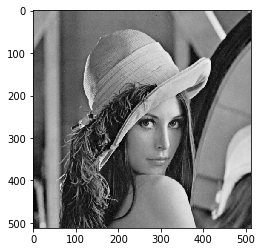

In [6]:
image = plt.imread('lena.png')
plt.imshow(image, cmap='gray')
plt.show()

Below I have implemented a Gaussian 5 X 5 filter and shown that convolving the image with the kernel is equivalent to multiplying the fourier transforms of the kernel and the image and then applying the inverse transform.

In [7]:
g_kernel = np.array([[1, 4, 6, 4, 1], [2, 8, 12, 8, 2], [6, 24, 36, 24, 6], [2, 8, 12, 8, 2], [1, 4, 6, 4, 1]])
g_kernel = (1/256.0) * g_kernel

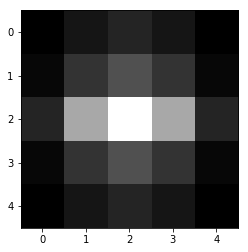

In [8]:
plt.imshow(g_kernel, cmap='gray')
plt.show()

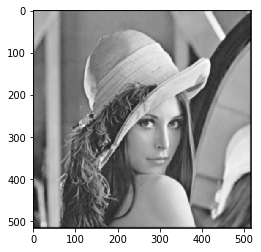

In [9]:
h1 = signal.convolve2d(image, g_kernel, mode='full')
#print(h1.shape)
plt.imshow(h1, cmap='gray')
plt.show()
H1 = computeFFT(h1)

In [10]:
padImage = np.pad(image, ((0,4), (0,4)), 'constant')
padGK = np.pad(g_kernel, ((256, 255), (256, 255)), 'constant')


In [11]:
F = computeFFT(padImage)
G = computeFFT(padGK)

In [12]:
H2 = np.multiply(F, G)
h2 = computeIFFT(H2)

In [13]:
mse1=(np.abs(H1-H2) ** 2).mean()
mse2=(np.abs(h1-h2) ** 2).mean()
print('difference between H1 and H2', mse1)
print('difference between h1 and h2', mse2)

difference between H1 and H2 9925.64236105
difference between h1 and h2 0.0372785678484


### 2)
Now that we have seen for a 5 X 5 kernel below I have performed the same operations for a different kernel of size 9 x 9.

In [14]:
kernel = np.array([[0,1,1,2,2,2,1,1,0], [1,2,4,5,5,5,4,2,1], [1,2,4,5,5,5,4,2,1], [2,5,3,-12,-24,-12,3,5,2], 
                  [2,5,0,-24,-40,-24,0,5,2], [2,5,3,-12,-24,-12,3,5,2], [1,2,4,5,5,5,4,2,1], [1,2,4,5,5,5,4,2,1], [0,1,1,2,2,2,1,1,0]])

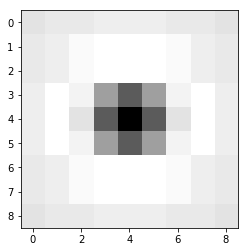

In [15]:
plt.imshow(kernel, cmap='gray')
plt.show()

(520, 520)


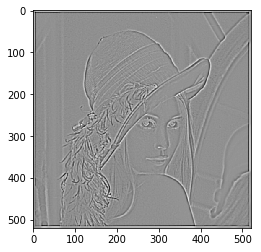

In [16]:
h1 = signal.convolve2d(image, kernel, mode='full')
print(h1.shape)
plt.imshow(h1, cmap='gray')
plt.show()
H1 = computeFFT(h1)

In [17]:
padImage = np.pad(image, ((0,8), (0,8)), 'constant')
padGK = np.pad(kernel, ((0, 511), (0, 511)), 'constant')

In [18]:
F = computeFFT(padImage)
G = computeFFT(padGK)

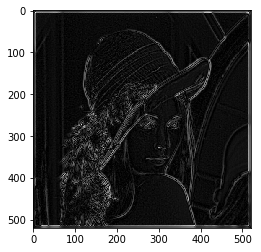

In [19]:
H2 = np.multiply(F, G)
h2 = computeIFFT(H2)
plt.imshow(abs(h2), cmap='gray')
plt.show()

In [20]:
mse1=(np.abs(H1-H2) ** 2).mean()
mse2=(np.abs(h1-h2) ** 2).mean()
print('difference between H1 and H2', mse1)
print('difference between h1 and h2', mse2)

difference between H1 and H2 4.69023645449e-07
difference between h1 and h2 1.73455490231e-12


If I center align the kernel then below is how the resulting image would be - 

In [21]:
padImage = np.pad(image, ((0,8), (0,8)), 'constant')
padGK = np.pad(kernel, ((256, 255), (256, 255)), 'constant')

In [22]:
F = computeFFT(padImage)
G = computeFFT(padGK)

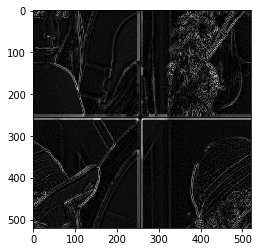

In [23]:
H2 = np.multiply(F, G)
h2 = computeIFFT(H2)
plt.imshow(abs(h2), cmap='gray')
plt.show()

In [24]:
mse1=(np.abs(H1-H2) ** 2).mean()
mse2=(np.abs(h1-h2) ** 2).mean()
print('difference between H1 and H2', mse1)
print('difference between h1 and h2', mse2)

difference between H1 and H2 37098307.3491
difference between h1 and h2 137.197882208


This time the difference is low, but not as low as expected and the image turns out to be different compared to the initial image.

### DCT Transform

On this kernel the difference is low but not as low as compared to the first one I tried out. Still the difference is almost negligible. Below I have tried out the above two kernels along with DCT transform instead of the FFT transform.

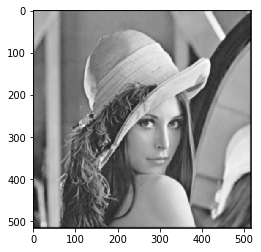

In [25]:
h1 = signal.convolve2d(image, g_kernel, mode='full')
plt.imshow(h1, cmap='gray')
plt.show()
D1 = computeDCT(h1)

In [26]:
padImage = np.pad(image, ((0,4), (0,4)), 'constant')
padGK = np.pad(g_kernel, ((0, 511), (0, 511)), 'constant')

In [27]:
F = computeDCT(padImage)
G = computeDCT(padGK)

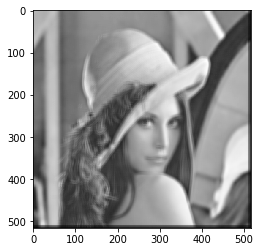

In [28]:
H2 = np.multiply(F, G)
h2 = computeIDCT(H2)
plt.imshow(h2, cmap='gray')
plt.show()

In [29]:
mse1=(np.abs(D1-H2) ** 2).mean()
mse2=(np.abs(h1-h2)** 2 ).mean()
print('difference between H1 and H2', mse1)
print('difference between h1 and h2', mse2)

difference between H1 and H2 5187098.13948
difference between h1 and h2 2.66572218707e+12


As we can see above even for DCT transform we can see that convolving the image with the kernel is equivalent to multiplying the fourier transforms of the kernel and the image and then applying the inverse transform.

### 2)
Below I have done the same with the 9X9 kernel like the one for FFT.

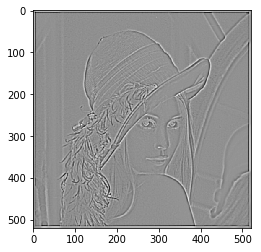

In [30]:
h1 = signal.convolve2d(image, kernel, mode='full')
plt.imshow(h1, cmap='gray')
plt.show()
D1 = computeDCT(h1)

In [31]:
padImage = np.pad(image, ((0,8), (0,8)), 'constant')
padGK = np.pad(kernel, ((0, 511), (0, 511)), 'constant')

In [32]:
F = computeDCT(padImage)
G = computeDCT(padGK)

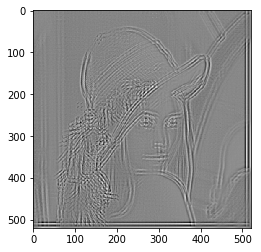

In [33]:
H2 = np.multiply(F, G)
h2 = computeIDCT(H2)
plt.imshow(h2, cmap='gray')
plt.show()

In [34]:
mse1=(np.abs(D1-H2) ** 2).mean()
mse2=(np.abs(h1-h2) ** 2).mean()
print('difference between H1 and H2', mse1)
print('difference between h1 and h2', mse2)

difference between H1 and H2 640765189.477
difference between h1 and h2 4.82298625433e+14


Again the difference is very low as expected.

If I center align the kernel then below is how the resulting image would be - 

In [35]:
padImage = np.pad(image, ((0,8), (0,8)), 'constant')
padGK = np.pad(kernel, ((256, 255), (256, 255)), 'constant')

In [36]:
F = computeDCT(padImage)
G = computeDCT(padGK)

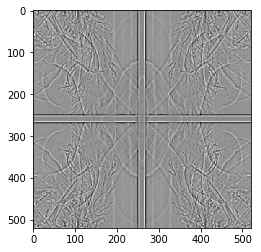

In [37]:
H2 = np.multiply(F, G)
h2 = computeIDCT(H2)
plt.imshow(h2, cmap='gray')
plt.show()

In [38]:
mse1=(np.abs(D1-H2) ** 2).mean()
mse2=(np.abs(h1-h2) ** 2).mean()
print('difference between H1 and H2', mse1)
print('difference between h1 and h2', mse2)

difference between H1 and H2 806380337.107
difference between h1 and h2 4.74692044554e+14


Even though the difference is low, the image turns out to be different compared to the initial image.